In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

## A brief summary about Random Forest

- Random forest, as the name suggests, is a collection of decision trees.
- Consider a random sample of data, build a decision tree on a certain number of predictors and repeat the process until a forest
is built. 
-- The data is sampled using "bootstrap" sampling techniques. In statistics, bootstrapping means sampling data by replacement.
- The "Out of bag error estimate" gives an unbiased error estimate of each decision tree in the random forest.
-- "Out of bag" samples are samples left out after bootstrapping. 
- The number of features cosidered for split is usually sqrt(N) where N is the total number of features.

In [24]:
from __future__ import division
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score,r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [11]:
df = pd.read_csv("D:\WEBSITE\german_credit.csv")

## Segregating response, categorical & numeric variables

In [12]:
target_var = ['Creditability']
cat_var = ['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Value Savings/Stocks', 
           'Length of current employment', 'Instalment per cent', 'Sex & Marital Status', 'Guarantors', 
           'Duration in Current address', 'Most valuable available asset', 'Concurrent Credits', 'Type of apartment',
          'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 'Foreign Worker']
num_var = ['Duration of Credit (month)', 'Credit Amount', 'Age (years)']

In [13]:
df1 = df.copy()
df1.drop(labels = target_var, axis=1, inplace = True)
df1.columns

Index([u'Account Balance', u'Duration of Credit (month)',
       u'Payment Status of Previous Credit', u'Purpose', u'Credit Amount',
       u'Value Savings/Stocks', u'Length of current employment',
       u'Instalment per cent', u'Sex & Marital Status', u'Guarantors',
       u'Duration in Current address', u'Most valuable available asset',
       u'Age (years)', u'Concurrent Credits', u'Type of apartment',
       u'No of Credits at this Bank', u'Occupation', u'No of dependents',
       u'Telephone', u'Foreign Worker'],
      dtype='object')

## Data Tranformation of Categorical Independent Variables

In [14]:
df2 = pd.get_dummies(data = df1, columns = cat_var, drop_first = False)
df2.head(5)

,Duration of Credit (month),Credit Amount,Age (years),Account Balance_1,Account Balance_2,Account Balance_3,Account Balance_4,Payment Status of Previous Credit_0,Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,...,Occupation_1,Occupation_2,Occupation_3,Occupation_4,No of dependents_1,No of dependents_2,Telephone_1,Telephone_2,Foreign Worker_1,Foreign Worker_2
0,18,1049,21,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,9,2799,36,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
2,12,841,23,0,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
3,12,2122,39,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,12,2171,38,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1


## Creating X & y to split, train & test

In [15]:
y = df[target_var].values
X= df2.values
y = np.ravel(y)
print "Size of y is {}".format(y.shape)
print "Sample output for y : {}".format(y[:5])
print "Size of X is {}".format(X.shape)
print "Sample output forr X :\n {}".format(X[:5,:])

Size of y is (1000L,)
Sample output for y : [1 1 1 1 1]
Size of X is (1000L, 71L)
Sample output forr X :
 [[  18 1049   21    1    0    0    0    0    0    0    0    1    0    0
     1    0    0    0    0    0    0    0    1    0    0    0    0    0
     1    0    0    0    0    0    0    1    0    1    0    0    1    0
     0    0    0    0    1    0    1    0    0    0    0    1    1    0
     0    1    0    0    0    0    0    1    0    1    0    1    0    1
     0]
 [   9 2799   36    1    0    0    0    0    0    0    0    1    1    0
     0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    1    0    0    0    1    0    0    0    0    1    0    1    0
     0    0    1    0    0    1    0    0    0    0    0    1    1    0
     0    0    1    0    0    0    0    1    0    0    1    1    0    1
     0]
 [  12  841   23    0    1    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0    1    0    0    1    0    0    0    0
     0    0   

 ## Splitting the data into test and train in order to build a model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 101)

In [17]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(500L, 71L)
(500L,)
(500L, 71L)
(500L,)


## Building Random Forests

Training accuracy is 100.0
Test accuracy is 74.6
Confusin Matrix 
 [[ 40 108]
 [ 19 333]]
Classification Report 
              precision    recall  f1-score   support

          0       0.68      0.27      0.39       148
          1       0.76      0.95      0.84       352

avg / total       0.73      0.75      0.71       500

Mean validation accuracy across 10 splits for train data is 0.72587194878
Mean validation accuracy across 10 splits for train data is 0.732


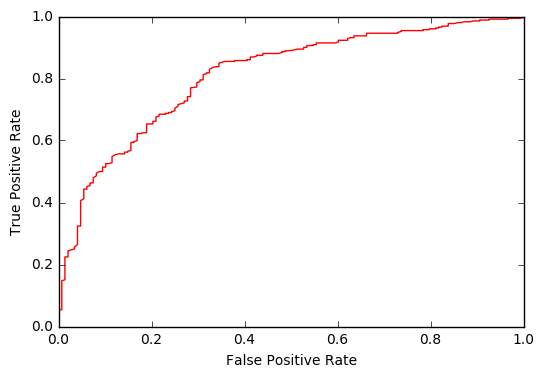

Area under the curve is 0.812068105037


In [22]:
clf = RandomForestClassifier(n_estimators = 1000 , criterion = 'gini', max_features = 'sqrt', oob_score = True, random_state = 101)
clf = clf.fit(X_train, y_train)

#predicting class labels for train set
predict_train = clf.predict(X_train)

# predicting probabilities
probs_train = clf.predict_proba(X_train)

#predicting class labels for test set
predict_test = clf.predict(X_test)

# predicting probabilities
probs_test = clf.predict_proba(X_test)

#Evaluating the model
print "Training accuracy is {}".format((metrics.accuracy_score(y_train,predict_train))*100)
print "Test accuracy is {}".format((metrics.accuracy_score(y_test,predict_test))*100)

#Creating a confusion matrix
print "Confusin Matrix \n {}".format(metrics.confusion_matrix(y_test, predict_test))

#generating a classification report
print "Classification Report \n {}".format(metrics.classification_report(y_test, predict_test))

#Introducing cross validation and evaluating the models

print "Mean validation accuracy across 10 splits for train data is {}".format(np.mean(cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = 10)))
print "Mean validation accuracy across 10 splits for train data is {}".format(np.mean(cross_val_score(clf, X, y, scoring = 'accuracy', cv = 10)))

#ROC for the model
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_test[:,1], pos_label = 1 )
# print "FP Rate, TP Rate & Thresholds"
# print "FP Rate is \n {}".format(fpr)
# print "TP Rate is \n {}".format(tpr)
# print thresholds
# print fpr.shape
# print tpr.shape
# print thresholds.shape

#plotting the ROC curve
fig=plt.figure()
plt.plot(fpr, tpr, 'r')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
fig.savefig('png2.png')
plt.close()

#Calculating Area under the curve
print "Area under the curve is {}".format(metrics.auc(fpr,tpr))


## Comparing Random Forest  with Decision Trees & Logistic Regression

Training accuracy for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=True, random_state=101,
            verbose=0, warm_start=False) is 100.0
Test accuracy for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=True, random_state=101,
            verbose=0, warm_start=False) is 74.6
Confusin Matrix for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
           

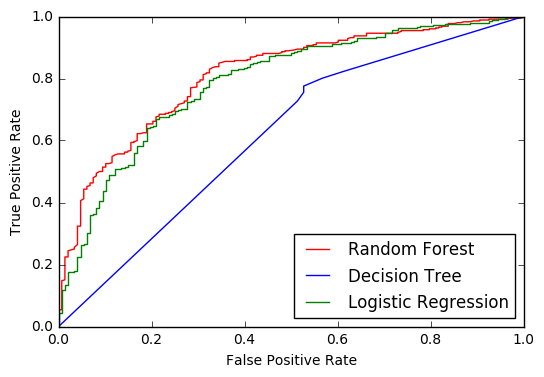

In [33]:
clf_RF = RandomForestClassifier(n_estimators = 1000 , criterion = 'gini', max_features = 'sqrt', oob_score = True, random_state = 101)
clf_tree = tree.DecisionTreeClassifier(min_samples_split = 5, random_state = 101)
clf_logistic = LogisticRegression(random_state = 101)

models = [clf_RF, clf_tree, clf_logistic]
fig=plt.figure()
color = ['r','b','g']
i = 0
label = ['Random Forest','Decision Tree', 'Logistic Regression']
j = 0
list_train = []
list_test = []
for mod in models:
    
    #training the models
    mod.fit(X_train,y_train)

    #predicting class labels for train set
    predict_train = mod.predict(X_train)
    
    # predicting probabilities
    probs_train = mod.predict_proba(X_train)

    #predicting class labels for test set
    predict_test = mod.predict(X_test)

    # predicting probabilities
    probs_test = mod.predict_proba(X_test)
    
    #Evaluating the model
    print "Training accuracy for {} is {}".format(mod, (metrics.accuracy_score(y_train,predict_train))*100)
    list_train.append(metrics.accuracy_score(y_train,predict_train)*100)
    print "Test accuracy for {} is {}".format(mod, (metrics.accuracy_score(y_test,predict_test))*100)
    list_test.append(metrics.accuracy_score(y_test,predict_test)*100)
    
    
    #Creating a confusion matrix
    print "Confusin Matrix for {} \n {}".format(mod, metrics.confusion_matrix(y_test, predict_test))
    
    #generating a classification report
    print "Classification Report for {} \n {}".format(mod, metrics.classification_report(y_test, predict_test))
    
    #ROC for the model
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_test[:,1], pos_label = 1 )
    
    #plotting the ROC curve
    plt.plot(fpr, tpr, color = color[i], label = label[j])
    i += 1
    j += 1
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc = 4)
#     plt.show()
#     fig.savefig('png2.png')
#     plt.close()

    #Calculating Area under the curve
    print "Area under the curve for {} is {}".format(mod, metrics.auc(fpr,tpr))
    
print list_train
print list_test


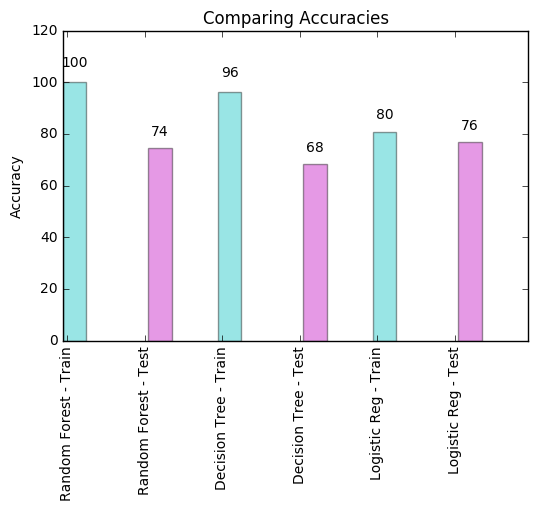

In [41]:
fig, ax = plt.subplots()
ind = np.arange(0,6,1)
rect1 = ax.bar(ind[[0,2,4]],list_train, 0.3, color = 'c', alpha = 0.4)
rect2 = ax.bar(ind[[1,3,5]]+0.1,list_test, 0.3, color = 'm', alpha = 0.4)
ax.set_title("Comparing Accuracies")
ax.set_ylabel("Accuracy")
ax.set_xticks(ind+0.1/2)
ax.set_xticklabels(['Random Forest - Train','Random Forest - Test','Decision Tree - Train','Decision Tree - Test','Logistic Reg - Train','Logistic Reg - Test'],rotation = 90)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

ax.set_ylim([0,120])
autolabel(rect1)
autolabel(rect2)
plt.show()